In [1]:
import pandas as pd
# Load the dataset

In [7]:
# Check the first few rows to understand the structure
data = pd.read_csv(r'C:\Users\USER\Downloads\archive\SalesDataOasis.csv')

In [11]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50,150
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30,30
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500,500
4,5,06/05/2023,CUST005,Male,30,Beauty,2,50,100


In [15]:
# Data cleaning
# Handle missing values.
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [17]:
# Check for duplicates
data.duplicated().sum()

0

In [19]:
# Check data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [31]:
# Convert Data Types
data['Date'] = pd.to_datetime(data['Date'])

In [33]:
# Create new columns for Year, Month, and Day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [35]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6


In [37]:
# Descriptive Statistics
# Calculate basic statistics
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Year,Month,Day
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,2023.002000,6.549000,15.310000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,2023.000000,1.000000,1.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,2023.000000,4.000000,7.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,2023.000000,6.000000,15.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,2023.000000,10.000000,23.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2024.000000,12.000000,31.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,0.044699,3.452755,8.871674


In [41]:
# Calculate the mode for categorical columns (e.g., gender, product category)
data['Gender'].mode()[0], data['Product Category'].mode()[0]

('Female', 'Clothing')

In [43]:
# Time Series Analysis
# Group by Date to Analyze Sales Trends
# Group by date and calculate total sales
sales_by_date = data.groupby('Date')['Total Amount'].sum()

In [45]:
# Plot the sales over time (line plot)
import matplotlib.pyplot as plt

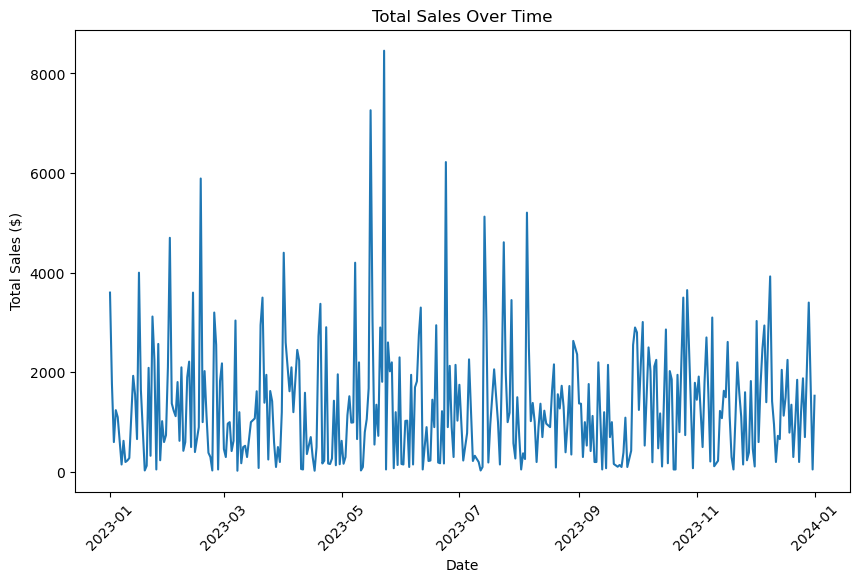

In [47]:
plt.figure(figsize=(10,6))
plt.plot(sales_by_date)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Resample the data by month and calculate total sales
sales_monthly = sales_by_date.resample('ME').sum()

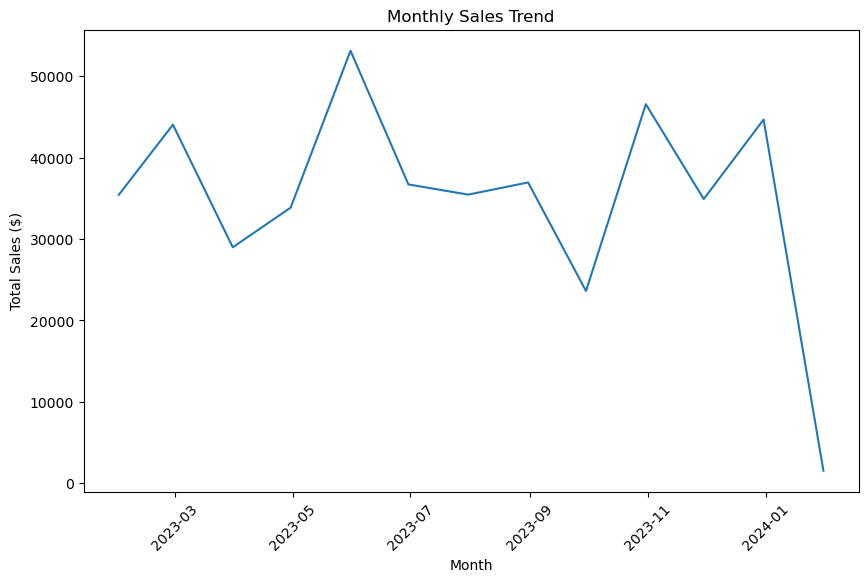

In [53]:
# Plot the monthly sales
plt.figure(figsize=(10,6))
plt.plot(sales_monthly)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

In [55]:
# Customer and Product Analysis
# Customer Demographics based gender and age columns
# Count the number of customers by gender
gender_distribution = data['Gender'].value_counts()


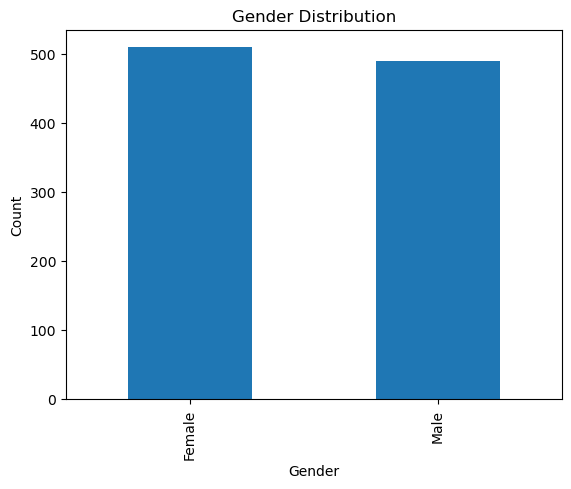

In [57]:
# Plot gender distribution
gender_distribution.plot(kind='bar', title='Gender Distribution')
plt.ylabel('Count')
plt.show()

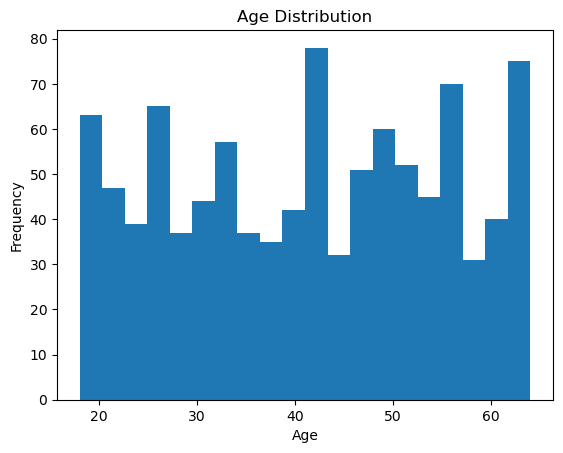

In [61]:
# Analyze the age distribution
data['Age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.show()

In [63]:
# Calculate average age
average_age = data['Age'].mean()

In [65]:
print(average_age)

41.392


In [67]:
# Product Analysis
# Analyze sales by product category and quantity sold
# Total sales per product category
sales_by_category = data.groupby('Product Category')['Total Amount'].sum()

In [69]:
print(sales_by_category)

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


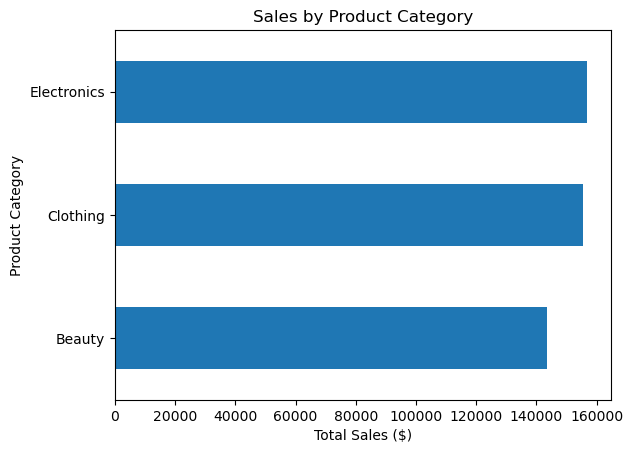

In [71]:
# Plot sales by product category
sales_by_category.sort_values().plot(kind='barh', title='Sales by Product Category')
plt.xlabel('Total Sales ($)')
plt.show()

In [73]:
# Total quantity sold per product category
quantity_by_category = data.groupby('Product Category')['Quantity'].sum()

In [75]:
print(quantity_by_category)

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


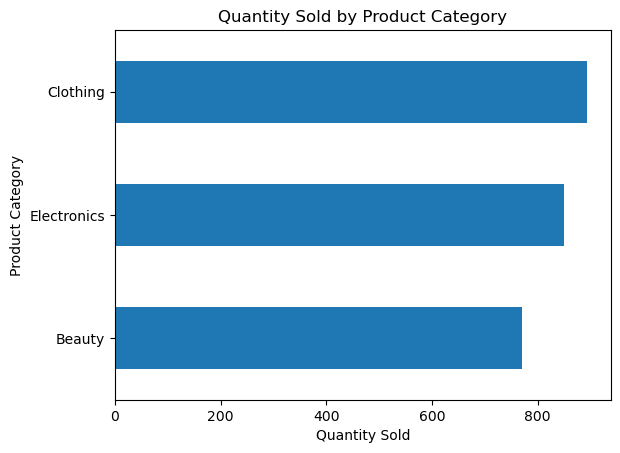

In [77]:
# Plot quantity sold by product category
quantity_by_category.sort_values().plot(kind='barh', title='Quantity Sold by Product Category')
plt.xlabel('Quantity Sold')
plt.show()

In [79]:
# Step 5: Visualization of Key Insights
# Correlation Heatmap to visualize correlations between numerical columns
import seaborn as sns

In [83]:
# Calculate the correlation matrix
corr_matrix = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

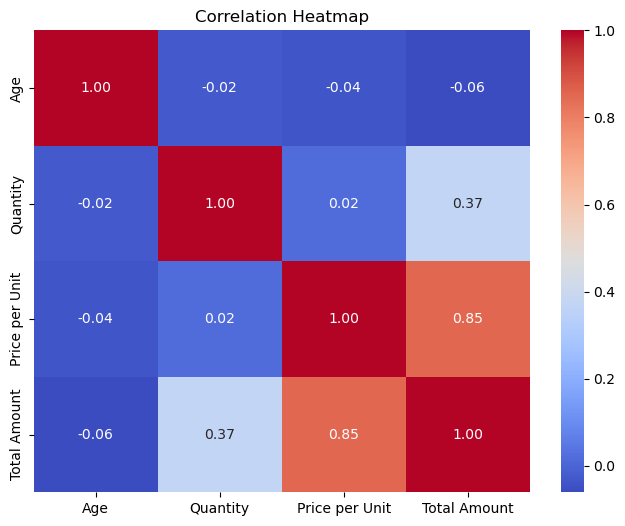

In [85]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [87]:
# Product Sales by Gender
# Group by product category and gender
sales_by_gender_category = data.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

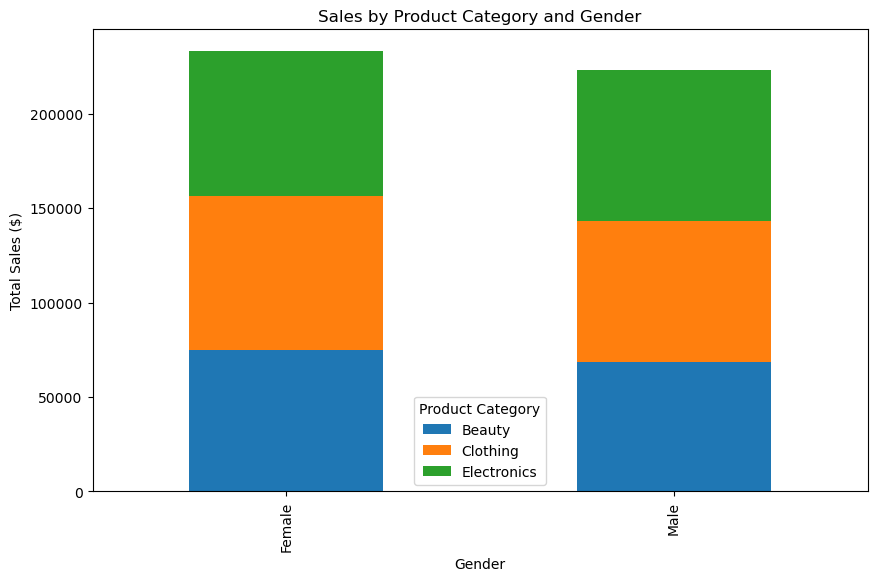

In [89]:
# Plot the data
sales_by_gender_category.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sales by Product Category and Gender')
plt.ylabel('Total Sales ($)')
plt.show()